In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz #to data visualize
import pydotplus #to convert to different datatype(like jpg,png)
from IPython.display import Image #to display image

In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


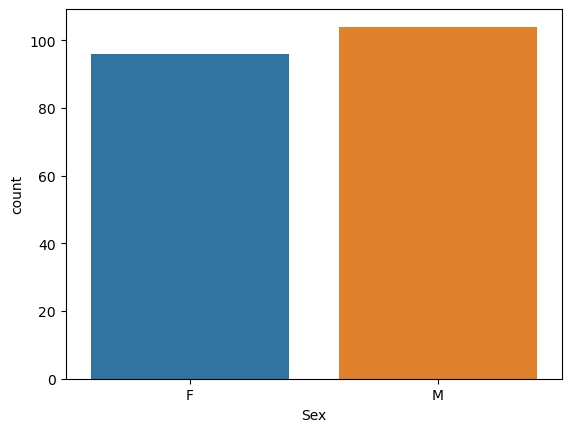

In [3]:
ax = sns.countplot(x = "Sex", data = df)

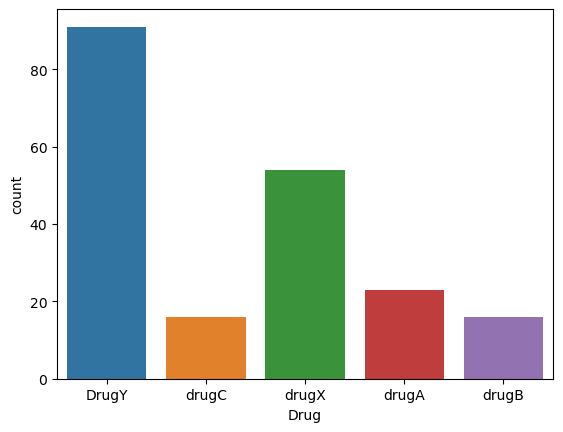

In [4]:
ax = sns.countplot(x = "Drug", data = df)

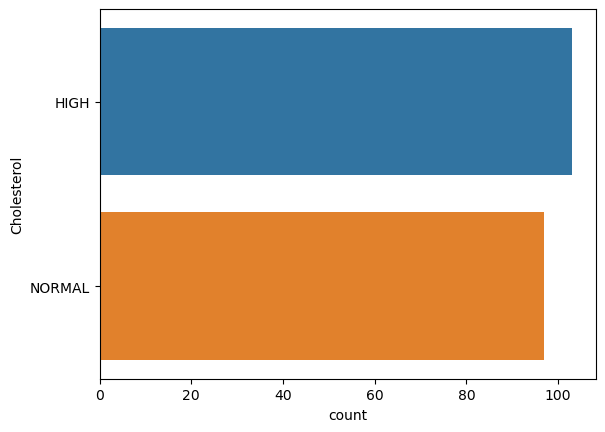

In [5]:
ax = sns.countplot(y = "Cholesterol", data = df)

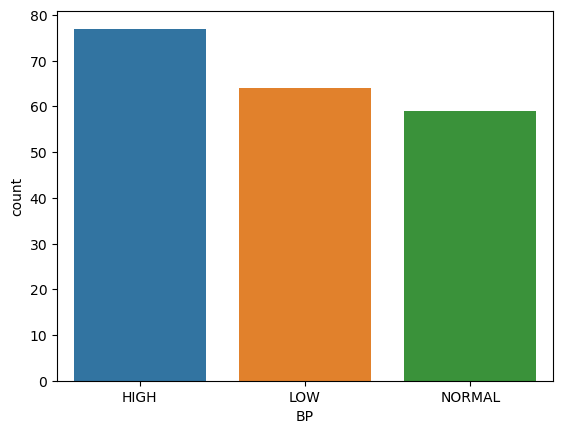

In [6]:
ax = sns.countplot(x = "BP", data = df)

In [7]:
df = pd.get_dummies(df, columns = ['Sex', 'Cholesterol', 'BP'])
df

,Age,Na_to_K,Drug,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL
0,23,25.355,DrugY,1,0,1,0,1,0,0
1,47,13.093,drugC,0,1,1,0,0,1,0
2,47,10.114,drugC,0,1,1,0,0,1,0
3,28,7.798,drugX,1,0,1,0,0,0,1
4,61,18.043,DrugY,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,1,0,0,1,0
196,16,12.006,drugC,0,1,1,0,0,1,0
197,52,9.894,drugX,0,1,1,0,0,0,1
198,23,14.020,drugX,0,1,0,1,0,0,1


In [8]:
scale = StandardScaler()
collab = ['Age', 'Na_to_K']
df[collab] = scale.fit_transform(df[collab])
df

,Age,Na_to_K,Drug,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL
0,-1.291591,1.286522,DrugY,1,0,1,0,1,0,0
1,0.162699,-0.415145,drugC,0,1,1,0,0,1,0
2,0.162699,-0.828558,drugC,0,1,1,0,0,1,0
3,-0.988614,-1.149963,drugX,1,0,1,0,0,0,1
4,1.011034,0.271794,DrugY,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,drugC,1,0,1,0,0,1,0
196,-1.715759,-0.565995,drugC,0,1,1,0,0,1,0
197,0.465676,-0.859089,drugX,0,1,1,0,0,0,1
198,-1.291591,-0.286500,drugX,0,1,0,1,0,0,1


In [9]:
X = df.drop('Drug', axis = 1)
y = df['Drug']
X

,Age,Na_to_K,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL
0,-1.291591,1.286522,1,0,1,0,1,0,0
1,0.162699,-0.415145,0,1,1,0,0,1,0
2,0.162699,-0.828558,0,1,1,0,0,1,0
3,-0.988614,-1.149963,1,0,1,0,0,0,1
4,1.011034,0.271794,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,1,0,1,0,0,1,0
196,-1.715759,-0.565995,0,1,1,0,0,1,0
197,0.465676,-0.859089,0,1,1,0,0,0,1
198,-1.291591,-0.286500,0,1,0,1,0,0,1


In [10]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Na_to_K,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL
79,-0.746232,-0.727807,1,0,0,1,0,1,0
197,0.465676,-0.859089,0,1,1,0,0,0,1
38,-0.322065,-0.884762,1,0,0,1,0,0,1
24,-0.685637,2.414907,1,0,1,0,0,1,0
122,-0.625042,0.884211,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
106,-1.352186,-0.573350,0,1,1,0,0,0,1
14,0.344485,-0.469268,1,0,1,0,0,0,1
92,-0.928019,1.854809,1,0,1,0,1,0,0
179,1.374607,-0.026851,1,0,1,0,0,0,1


In [12]:
X_test

,Age,Na_to_K,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL
95,-0.503851,-0.646762,0,1,0,1,0,1,0
15,-1.715759,-0.078892,1,0,0,1,1,0,0
30,-1.594568,-1.017848,1,0,0,1,0,0,1
158,0.889843,-0.782762,1,0,1,0,0,1,0
128,0.162699,2.422679,0,1,0,1,0,1,0
115,0.405080,0.306766,0,1,1,0,1,0,0
69,-1.594568,1.136783,1,0,0,1,1,0,0
170,-0.988614,-0.444843,1,0,1,0,0,0,1
174,-0.140278,-0.460525,0,1,0,1,1,0,0
45,1.314011,-1.107081,1,0,0,1,0,0,1


In [13]:
y_train

79     drugX
197    drugX
38     drugX
24     DrugY
122    DrugY
       ...  
106    drugX
14     drugX
92     DrugY
179    DrugY
102    drugC
Name: Drug, Length: 160, dtype: object

In [14]:
y_test

95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
115    DrugY
69     DrugY
170    drugX
174    drugA
45     drugX
66     drugA
182    drugX
165    DrugY
78     drugA
186    drugB
177    DrugY
56     drugB
152    drugX
82     drugC
68     DrugY
124    drugB
16     drugX
148    drugX
93     DrugY
65     DrugY
60     DrugY
84     drugC
67     drugX
125    DrugY
132    drugX
9      DrugY
18     drugC
55     drugC
75     DrugY
150    drugA
104    DrugY
135    drugX
137    drugA
164    DrugY
76     drugA
Name: Drug, dtype: object

In [15]:
Clf = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features=None, random_state=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, class_weight=None)
Clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = Clf.predict(X_test)
y_pred

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy :", accuracy,
     "\n Classification report :\n", report)

Accuracy : 1.0 
 Classification report :
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



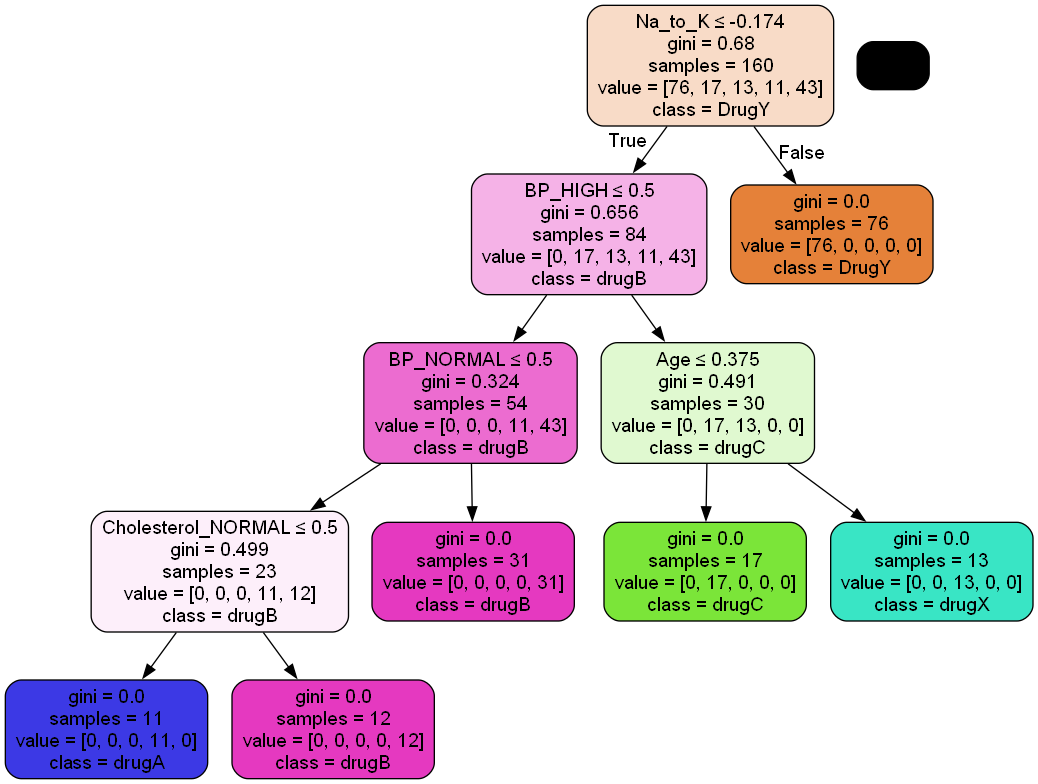

In [18]:
Clf = DecisionTreeClassifier(random_state=42)
Clf.fit(X_train, y_train)

dot_data = export_graphviz(Clf, out_file=None,
                          feature_names=X.columns,
                          class_names=y.unique(),
                          filled=True, rounded=True,
                          special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')


Image('decision_tree.png')